In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample dataset (points in 2D)
X = np.array([
    [1,2],[1,4],[1,0],
    [10,2],[10,4],[10,0],
    [5,8],[6,9],[5,11]
])


In [4]:
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [5]:
def init_centroids(X, k):
    idx = np.random.choice(len(X), k, replace=False)
    return X[idx]


In [6]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        dists = [distance(x, c) for c in centroids]
        clusters.append(np.argmin(dists))
    return np.array(clusters)


In [7]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        dists = [distance(x, c) for c in centroids]
        clusters.append(np.argmin(dists))
    return np.array(clusters)


In [8]:
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        pts = X[clusters == i]
        new_centroids.append(np.mean(pts, axis=0))
    return np.array(new_centroids)


In [9]:
def kmeans(X, k=3, max_iters=100):
    centroids = init_centroids(X, k)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        if np.allclose(centroids, new_centroids):
            break  # converged

        centroids = new_centroids

    return centroids, clusters


In [10]:
final_centroids, clusters = kmeans(X, k=3)

print("Final centroids:\n", final_centroids)
print("Clusters:", clusters)


Final centroids:
 [[ 5.33333333  9.33333333]
 [ 1.          2.        ]
 [10.          2.        ]]
Clusters: [1 1 1 2 2 2 0 0 0]


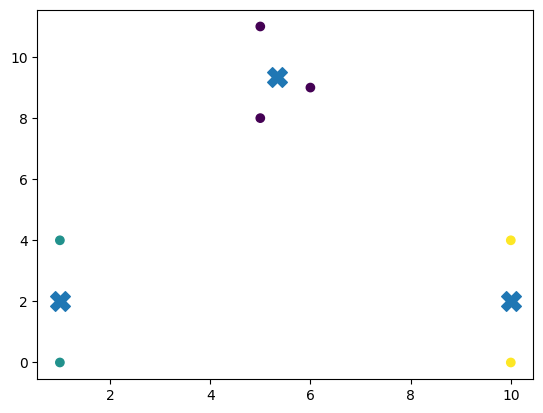

In [11]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.scatter(final_centroids[:,0], final_centroids[:,1], s=200, marker='X')
plt.show()
